In [2]:
import time
import praw
import pandas as pd

reddit = praw.Reddit(
    client_id="Hz2zkQJCMOiFVifmyeGzrg",
    client_secret="2_ydmLRpoLBtuqOx_6WNoq1j59BZXw",
    user_agent="Emergency Management",
)



params = {'sort':'new', 'limit':None, 'time_filter':'month'}

columns = ['author', 'author_flair_text', 'clicked', 'comments', 'created_utc',
           'distinguished', 'edited', 'id', 'is_original_content', 'is_self',
           'link_flair_template_id', 'link_flair_text', 'locked', 'name',
           'num_comments', 'over_18', 'permalink', 'poll_data', 'saved', 'score',
           'selftext', 'spoiler', 'stickied', 'subreddit', 'title', 'upvote_ratio', 'url']

df = pd.DataFrame(columns=columns)

for submission in reddit.subreddit("all").search("wildfire", **params):
    new_row = {
        'author': submission.author.name,
        'created_utc': int(submission.created_utc),
        'id': submission.id,
        'name': submission.name,
        'num_comments': submission.num_comments,
        'permalink': submission.permalink,
        'selftext': submission.selftext,
        'subreddit': submission.subreddit.display_name,
        'title': submission.title,
        'upvote_ratio': submission.upvote_ratio,
        'url': submission.url
    }
    df.loc[len(df)] = new_row



df.to_csv('./reddit.csv', index=False)
df.head()


,author,author_flair_text,clicked,comments,created_utc,distinguished,edited,id,is_original_content,is_self,...,poll_data,saved,score,selftext,spoiler,stickied,subreddit,title,upvote_ratio,url
0,locodallas,NaN,NaN,NaN,1692918997,NaN,NaN,160hprs,NaN,NaN,...,NaN,NaN,NaN,Literally thought I was on this sub and was wa...,NaN,NaN,CoronavirusCirclejerk,Thought I was reading satire,0.67,https://www.reddit.com/gallery/160hprs
1,JeanChretieninSpirit,NaN,NaN,NaN,1692918877,NaN,NaN,160hnsx,NaN,NaN,...,NaN,NaN,NaN,Has there been a noticeable impact from the wi...,NaN,NaN,askTO,Exploring the Intricacies of Toronto's Summer ...,1.00,https://www.reddit.com/r/askTO/comments/160hns...
2,RobotTomPeterson,NaN,NaN,NaN,1692918825,NaN,NaN,160hmzi,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,PortlandOregon,"What wildfire evacuation notices mean, steps t...",1.00,https://www.kgw.com/article/news/local/wildfir...
3,PacificProvince,NaN,NaN,NaN,1692918453,NaN,NaN,160hh5j,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,ilovebc,"'It was a violent event,' B.C. fire chief says...",1.00,https://bc.ctvnews.ca/it-was-a-violent-event-b...
4,floppydisk69,NaN,NaN,NaN,1692918452,NaN,NaN,160hh4y,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,facepalm,Really Exoticca? Too soon.,0.33,https://i.redd.it/8m71vjdq35kb1.jpg


In [50]:
df['created_utc_clean'] = df['created_utc'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(x)))
df['created_utc_clean'].head()

0    2023-08-24 16:58:58
1    2023-08-24 16:58:32
2    2023-08-24 16:54:25
3    2023-08-24 16:51:10
4    2023-08-24 16:50:12
Name: created_utc_clean, dtype: object

In [51]:
df['created_utc_clean'].tail()

243    2023-08-23 21:56:28
244    2023-08-23 21:46:30
245    2023-08-23 21:37:20
246    2023-08-23 21:36:36
247    2023-08-23 21:36:22
Name: created_utc_clean, dtype: object

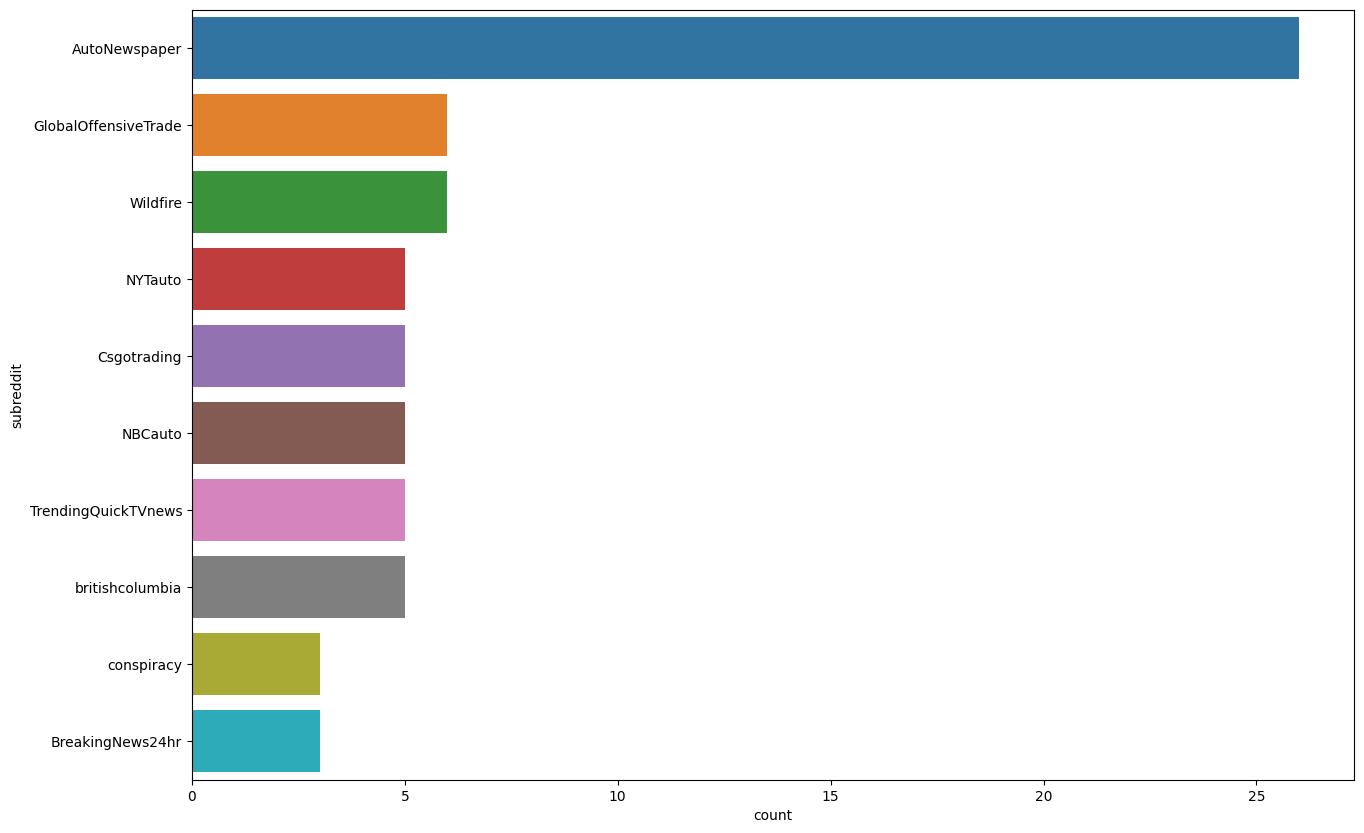

In [52]:
# create a fig with most frequent subreddits
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="subreddit", data=df, order=df['subreddit'].value_counts().iloc[:10].index, ax=ax)
plt.show()

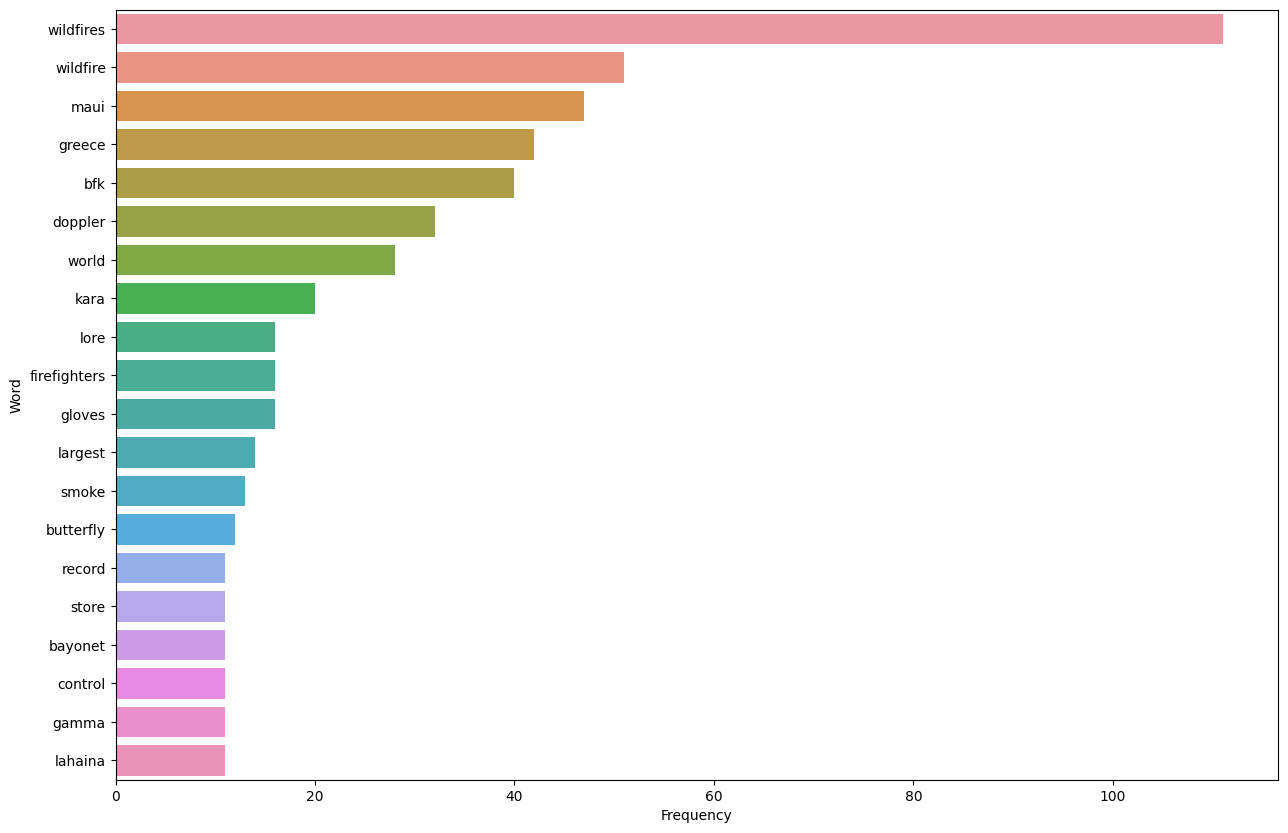

In [53]:
# create a fig with most keywords in titles
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from collections import Counter
from gensim.parsing.preprocessing import STOPWORDS


fig, ax = plt.subplots(figsize=(15, 10))
all_titles = ' '.join(df['title'].tolist())
all_titles = all_titles.lower()
words = word_tokenize(all_titles)
word_counts = Counter(words)
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)
word_counts_df = word_counts_df[word_counts_df['Word'].str.len() > 2]
word_counts_df = word_counts_df[~word_counts_df['Word'].isin(STOPWORDS)]

sns.barplot(x="Frequency", y="Word", data=word_counts_df.iloc[:20], ax=ax)
plt.show()

0    2023-08-24
1    2023-08-24
2    2023-08-24
3    2023-08-24
4    2023-08-24
Name: created_utc, dtype: object
created_utc
2023-08-24    248
Name: count, dtype: int64


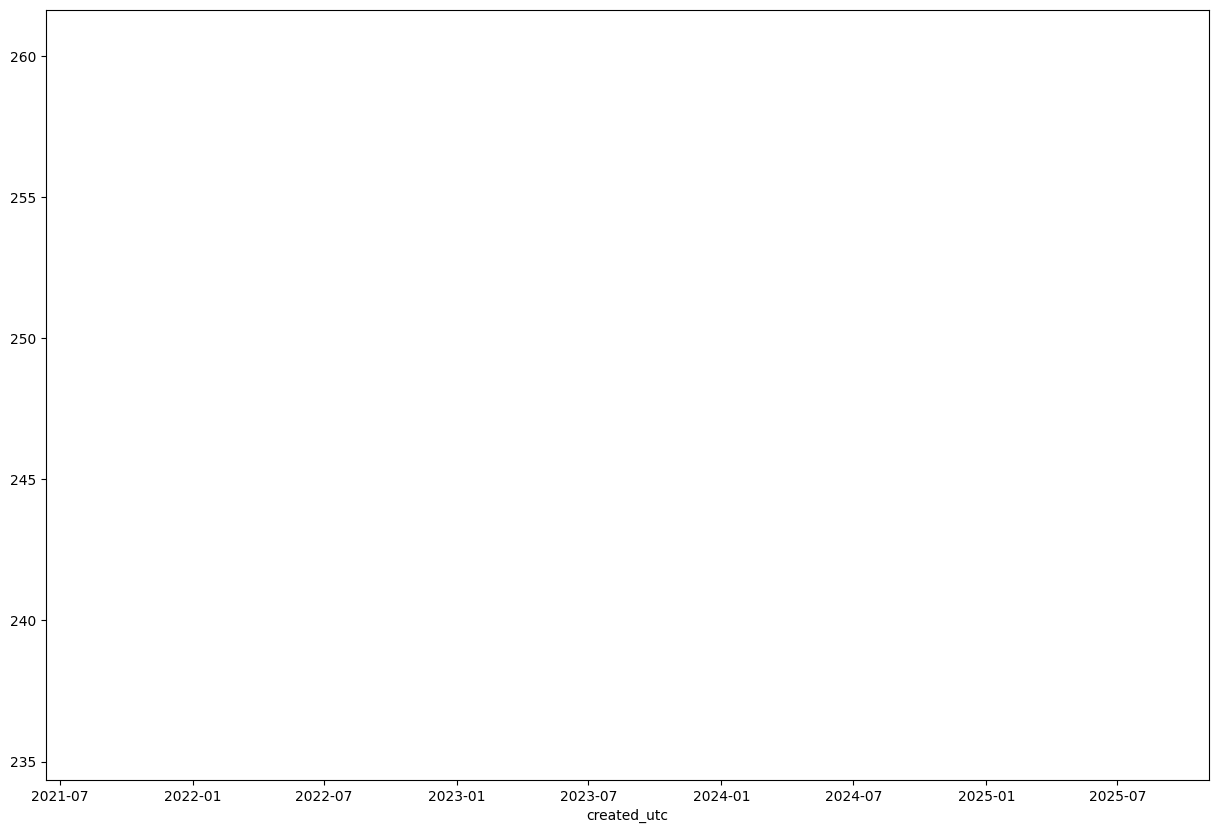

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df_copy = df.copy()
df_copy['created_utc'] = df_copy['created_utc'].apply(lambda x: pd.to_datetime(x, unit='s'))

daily_counts = df_copy['created_utc'].dt.date
print(daily_counts.head())
daily_counts = daily_counts.value_counts()
daily_counts = daily_counts[daily_counts > 1]
print(daily_counts)

fig, ax = plt.subplots(figsize=(15, 10))
daily_counts.plot(ax=ax)
plt.show()